# Exploring the Central Limit Theorem via Simulations

Let's look at an example of applying the central limit theorem.

Suppose $X_1, \ldots, X_{50} \sim \text{Exp}(2)$.  As a reminder, if $X \sim Exp(\lambda)$ then the density function is given by

$f(x | \lambda) = \lambda e^{-\lambda x}$

The mean and variance are given by $E(X) = \frac{1}{\lambda}$ and $Var(X) = \frac{1}{\lambda^2}$.

Here is a plot of the Exp$(2)$ distribution:


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



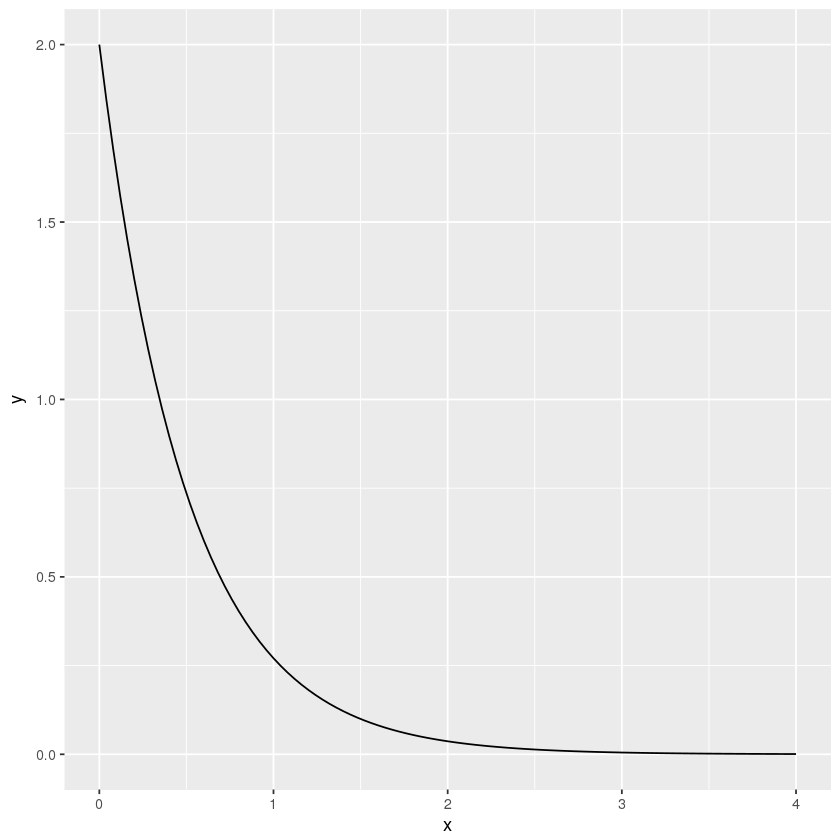

In [1]:
library(ggplot2)
library(dplyr)

base_df <- data.frame(
  x = c(0, 4)
)

ggplot(data = base_df, mapping = aes(x = x)) +
  stat_function(fun = dexp, args = list(rate = 2))

### (a) Find the normal approximation to the sampling distribution of the sample mean from the Central Limit Theorem

The mean of each exponential random variable is $\frac{1}{\lambda} = \frac{1}{2}$, and the variance is $\frac{1}{\lambda^2} = \frac{1}{4}$.  The approximation to the sampling distribution of the sample mean from the Central Limit Theorem is therefore

$\bar{X} \sim \text{Normal}(\frac{1}{2}, \frac{1}{4 \cdot 50})$

### (b) Using the normal approximation from part (a), find an approximate value for the probability $P(\bar{X} > 0.6)$

You may find it helpful to use the `pnorm` function.  For example, if $X \sim \text{Normal}(4, 3^2)$ then `pnorm(1, mean = 4, sd = 3)` calculates $P(X \leq 1)$.

In [2]:
1 - pnorm(0.6, mean = 0.5, sd = sqrt(1/200))

[1] 0.0786496

### (c) Perform a simulation to get a different approximation to the sampling distribution of the sample mean

There is some starter code below.  In this code, we repeatedly simulate samples of size 30 from the specified Gamma distribution and calculate the sample mean based on each of those samples.  By repeating this process 1000 times, we can get a simulated approximation to the sampling distribution of the sample mean.

sample_mean
0.4920208
0.5386556
0.4473411
0.5219509
0.4609024
0.5270131
0.4787346
0.4259347
0.4966352
0.3863542


mean,sd
0.500095,0.07021924


[1] 0.082

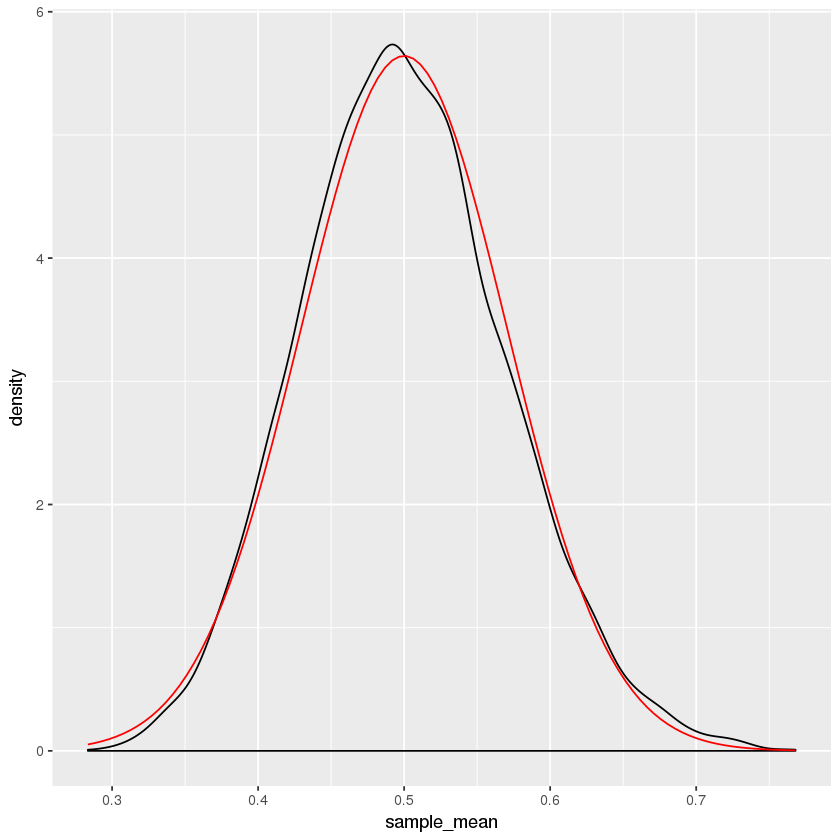

In [4]:
# set a seed for random number generation to make sure I get a similar picture on different runs of this code
set.seed(1)

# how many simulations to perform
n_sims <- 10000

# sample size to generate in each simulation
sample_size <- 50

# initialize a storage vector for the results
# in R, memory allocation in slow, so it's best to create an empty vector before a for loop,
# and then set each element of the vector
simulation_results <- data.frame(
    sample_mean = numeric(n_sims)
)

# a for loop runs the commands between the curly brackets {} multiple times
# in this case, we run these commands once for each value of i in the vector created by seq_len(n_sims)
# it's good practice to create the indices for the loop via seq_len(n_sims) instead of
# something like 1:n_sims because this way the loop will run 0 times if n_sims is 0
# (if n_sims was equal to 0 and you used 1:n_sims, the loop would run twice:
# once for i = 1 and once for i = 0)
for(i in seq_len(n_sims)) {
    x <- rexp(sample_size, rate = 2)
    simulation_results$sample_mean[i] <- mean(x)
}

simulation_results

# Insert code here to make a plot of the simulation results, compared to the approximate normal distribution
# you calculated in part (a) for the sampling distribution of the sample mean.
# Use ggplot, with geom_density to summarize the results of the sample study
# and stat_function to plot the approximate normal distribution.
# There is example code for this in the first problem set.
ggplot(data = simulation_results, mapping = aes(x = sample_mean)) +
  geom_density() +
  stat_function(fun = dnorm, args = list(mean = 0.5, sd = sqrt(1/(4 * 50))), color = "red")

# Insert code here to calculate the mean (using the mean function)
# and standard deviation (using the sd function) of the simulation results
summarize(simulation_results, mean = mean(sample_mean), sd = sd(sample_mean))

# Insert code here to calculate the proportion of simulations where the sample mean was greater than 0.6.
# (Note: In the original document, I had asked to you to calculate the proportion of simulations where the
# sample mean was greater than 3; I had intended to use 0.6, to match with part b above.)
# You can do this in two stages: first, a comparison like simulation_results$sample_mean > 0.6 will return a logical vector,
# with TRUE in positions where the condition is met and FALSE in positions where the condition is not met.
# Second, R computes the mean of a logical vector as the proportion of entries that are TRUE.
# For example, mean(c(TRUE, TRUE, FALSE, FALSE)) = 0.5
mean(simulation_results$sample_mean > 0.6)

### (d) How do the results from part (c) compare to your results from parts (a) and (b)?

Discuss three things:
 * the plot of the simulated sampling distribution as compared to the normal approximation;
 * the mean and standard deviation of the simulated sampling distribution as compared to the normal approximation;
 * the estimated probability that the sample mean will be greater than 0.6 from the simulation study as compared to the probability calculated from the normal approximation.

The approximation to the sampling distribution from the simulation and the normal distribution approximation from the Central Limit Theorem are similar, but not exactly the same.  There is a very slight right skew in the approximation from simulation that is not captured by the normal distribution.  This right skew is present because the original exponential distribution we are sampling from is skewed right.  On the other hand, the approximation from simulation also has disadvantages.  First, as can be seen from the plot, there are some "bumps" in the density curve from the simulation; the black density curve is not a smooth as we might expect.  These don't reflect an actual lack of smoothness in the true sampling distribution - they are an artifact of the random sampling process used to approximate the sampling distribution.  If we increased the number of simulation from 10000 to 1 million, the approximation to the sampling distribution would be smoother.  However, that brings us to the second disadvantage of the simulation-based approach: it is more computationally intensive.  That wasn't such a big deal in this case; it only took a couple of seconds to do the 10000 simulations.  But calculation of the normal distribution approximation is nearly instantaneous, and in more complex models doing many simulations could take a long time.

The mean and standard deviation of the approximated sampling distributions agree to three decimal places in both approaches.

The approximate probability of observing a sample mean greater than 0.6 is also similar in both approaches: this probability is estimated to be about 0.079 from the CLT normal approximation, and about 0.082 from the simulation-based approach.  The larger probability from the simulation-based approach corresponds to the right skew discussed above.

Overall, for most purposes these two approximations to the sampling distribution agree well enough that I'd be comfortable using either one in this case.  If getting exact numbers was important, I'd use an exact specification for the sampling distribution, or use the simulation approach with more simulations.  If the sample size was much smaller, I'd definitely prefer the simulation-based approach.  If the sample size was much larger, the CLT-based approach might be preferred; the sampling distribution is closer to normal with larger sample sizes, and doing the simulations takes longer.